In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load the CSV file into a DataFrame
path = Path("../logs/rl_games/reach_ur10e/2025-10-30_14-16-56/play_log.csv")
df = pd.read_csv(path)

# Filter for env_id 0 and create episode_id based on episode_step resets
df_env0 = df[df['env_id'] == 0].copy()
df_env0['episode_id'] = (df_env0['episode_step'] < df_env0['episode_step'].shift(1)).cumsum()

# Display the first few rows of the DataFrame
df_env0.head()

,step,sim_time,env_id,episode_step,shoulder_pan_joint_pos,shoulder_lift_joint_pos,elbow_joint_pos,wrist_1_joint_pos,wrist_2_joint_pos,wrist_3_joint_pos,...,elbow_joint_soft_vel_limit,wrist_1_joint_soft_vel_limit,wrist_2_joint_soft_vel_limit,wrist_3_joint_soft_vel_limit,robotiq_hande_left_finger_joint_soft_vel_limit,robotiq_hande_right_finger_joint_soft_vel_limit,ee_frame_pos_x,ee_frame_pos_y,ee_frame_pos_z,episode_id
0,1,0.033333,0,1,0.001495,-1.566094,1.566807,-1.545270,-1.599173,-0.009354,...,3.1416,3.1416,3.1416,3.1416,0.05,0.05,0.686829,0.167430,0.516995,0
1,2,0.066667,0,2,-0.004728,-1.558549,1.567754,-1.515704,-1.625988,-0.034224,...,3.1416,3.1416,3.1416,3.1416,0.05,0.05,0.681859,0.155866,0.508321,0
2,3,0.100000,0,3,-0.018523,-1.548190,1.573123,-1.485560,-1.655699,-0.063919,...,3.1416,3.1416,3.1416,3.1416,0.05,0.05,0.677114,0.138478,0.495400,0
3,4,0.133333,0,4,-0.034326,-1.534051,1.581179,-1.455478,-1.681810,-0.093900,...,3.1416,3.1416,3.1416,3.1416,0.05,0.05,0.672352,0.120897,0.478880,0
4,5,0.166667,0,5,-0.049179,-1.516269,1.591260,-1.425618,-1.691804,-0.125864,...,3.1416,3.1416,3.1416,3.1416,0.05,0.05,0.667238,0.108520,0.458983,0


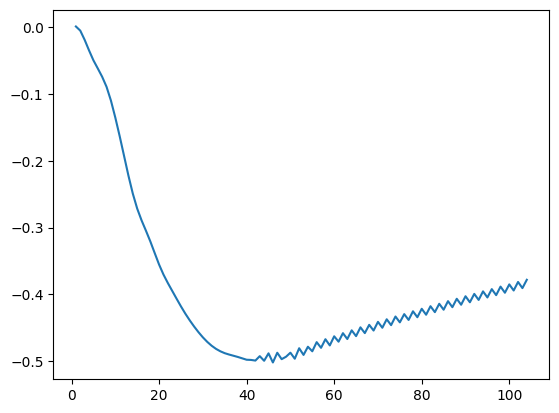

In [3]:
episode = df_env0[df_env0['episode_id'] == 0]
plt.plot(episode['episode_step'], episode['shoulder_pan_joint_pos'])

In [4]:
# Define joint names
arm_joints = ['shoulder_pan_joint', 'shoulder_lift_joint', 'elbow_joint', 
              'wrist_1_joint', 'wrist_2_joint', 'wrist_3_joint']
gripper_joints = ['robotiq_hande_left_finger_joint', 'robotiq_hande_right_finger_joint']

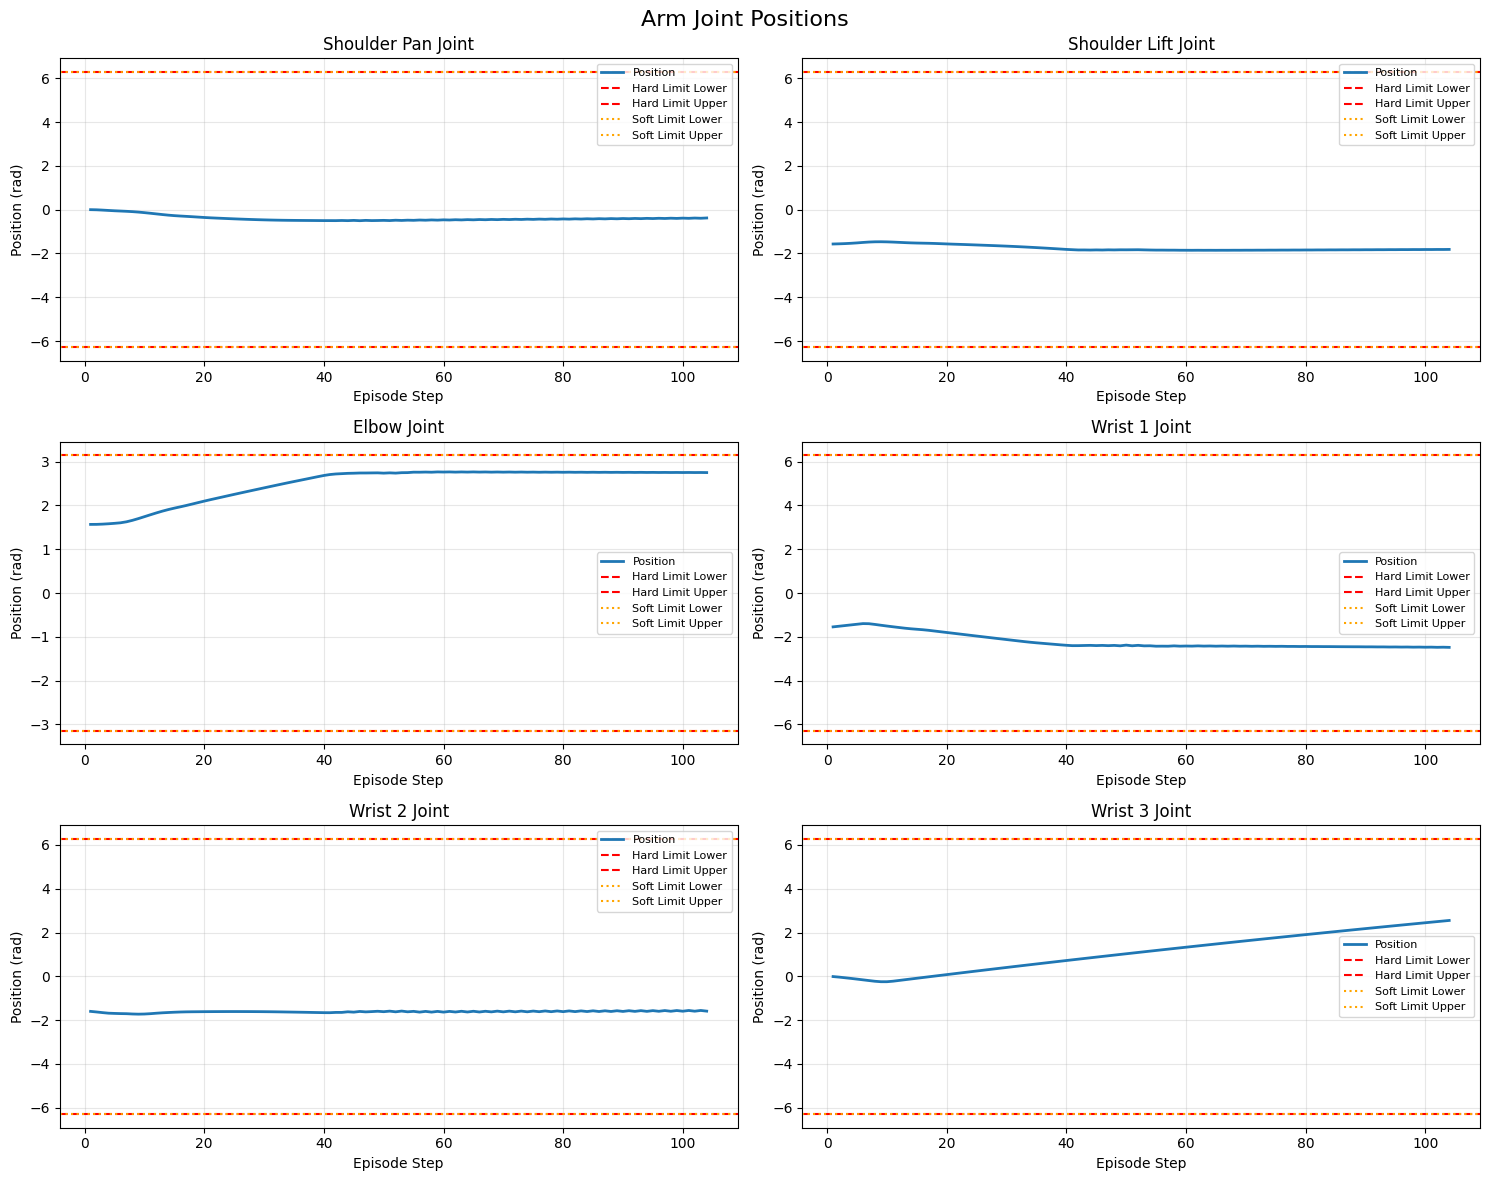

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Arm Joint Positions', fontsize=16)
axes = axes.flatten()

for idx, joint in enumerate(arm_joints):
    ax = axes[idx]
    # Plot position
    ax.plot(episode['episode_step'], episode[f'{joint}_pos'], label='Position', linewidth=2)
    # Plot position limits
    pos_limit_lower = episode[f'{joint}_pos_limit_lower'].iloc[0]
    pos_limit_upper = episode[f'{joint}_pos_limit_upper'].iloc[0]
    ax.axhline(y=pos_limit_lower, color='r', linestyle='--', label='Hard Limit Lower', linewidth=1.5)
    ax.axhline(y=pos_limit_upper, color='r', linestyle='--', label='Hard Limit Upper', linewidth=1.5)
    # Plot soft limits
    soft_pos_limit_lower = episode[f'{joint}_soft_pos_limit_lower'].iloc[0]
    soft_pos_limit_upper = episode[f'{joint}_soft_pos_limit_upper'].iloc[0]
    ax.axhline(y=soft_pos_limit_lower, color='orange', linestyle=':', label='Soft Limit Lower', linewidth=1.5)
    ax.axhline(y=soft_pos_limit_upper, color='orange', linestyle=':', label='Soft Limit Upper', linewidth=1.5)
    
    ax.set_xlabel('Episode Step')
    ax.set_ylabel('Position (rad)')
    ax.set_title(joint.replace('_', ' ').title())
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('arm_joint_positions.png', dpi=300, bbox_inches='tight')
plt.show()

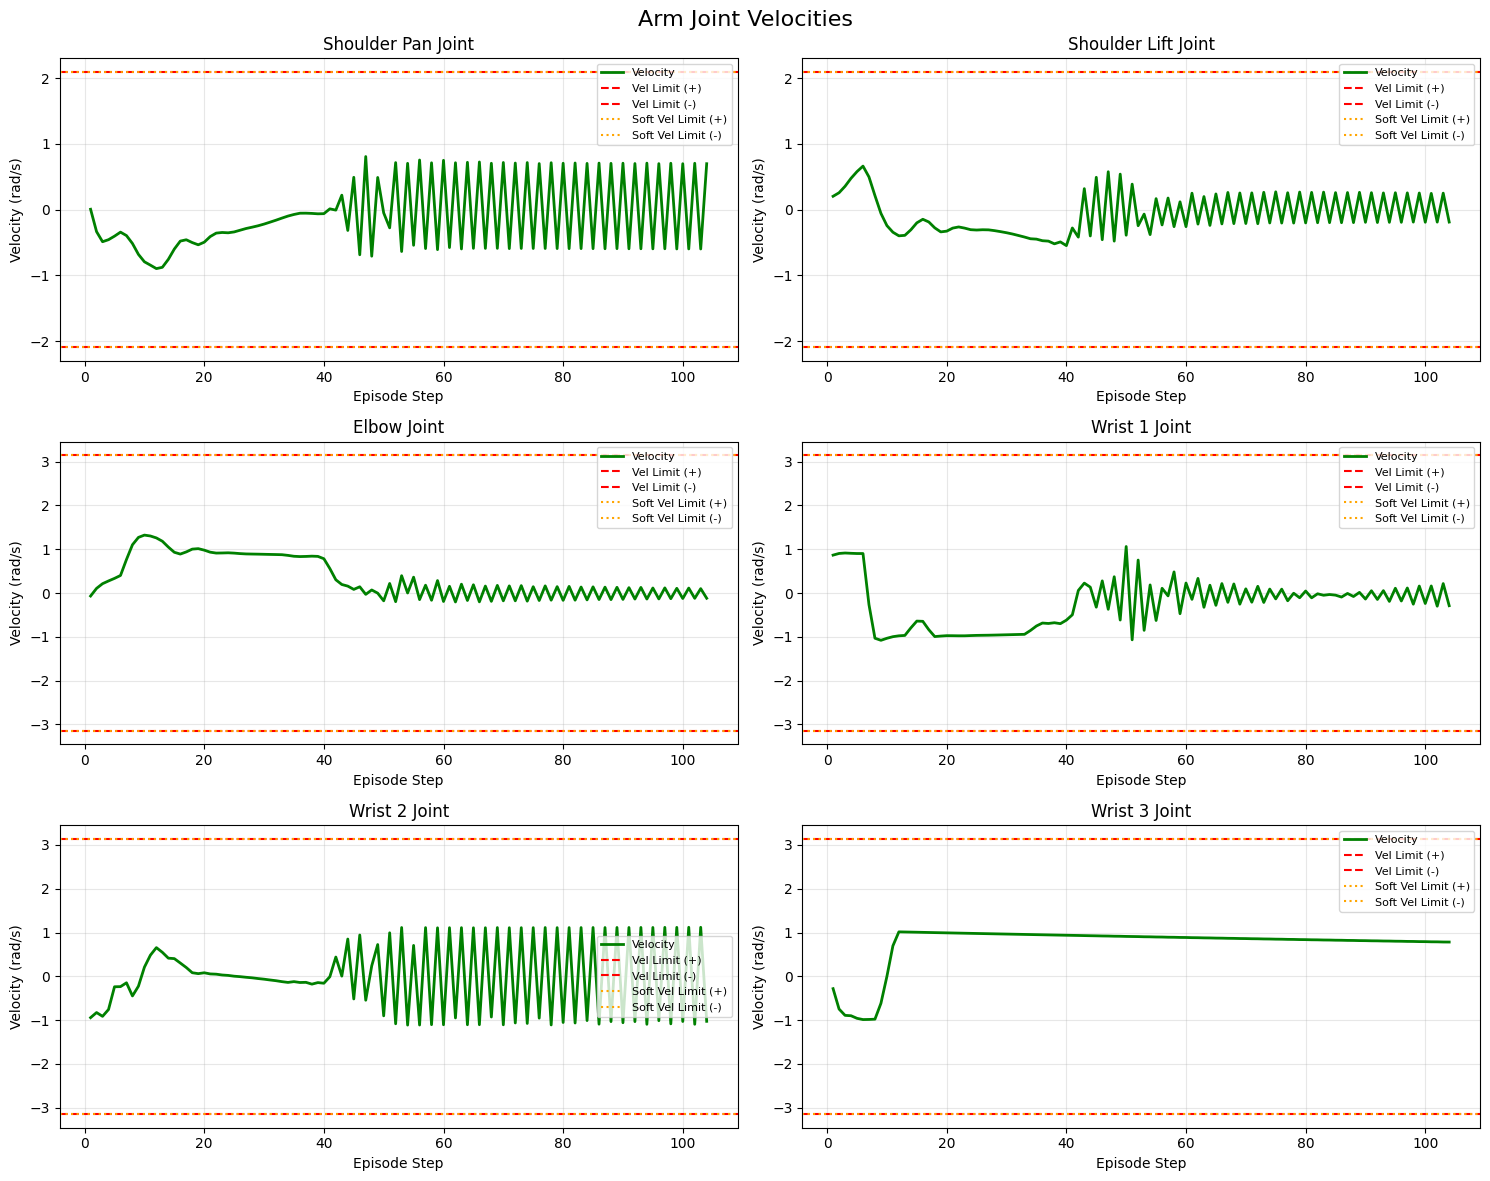

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Arm Joint Velocities', fontsize=16)
axes = axes.flatten()

for idx, joint in enumerate(arm_joints):
    ax = axes[idx]
    # Plot velocity
    ax.plot(episode['episode_step'], episode[f'{joint}_vel'], label='Velocity', linewidth=2, color='green')
    # Plot velocity limits (symmetric)
    vel_limit = episode[f'{joint}_vel_limit'].iloc[0]
    ax.axhline(y=vel_limit, color='r', linestyle='--', label='Vel Limit (+)', linewidth=1.5)
    ax.axhline(y=-vel_limit, color='r', linestyle='--', label='Vel Limit (-)', linewidth=1.5)
    # Plot soft limits (symmetric)
    soft_vel_limit = episode[f'{joint}_soft_vel_limit'].iloc[0]
    ax.axhline(y=soft_vel_limit, color='orange', linestyle=':', label='Soft Vel Limit (+)', linewidth=1.5)
    ax.axhline(y=-soft_vel_limit, color='orange', linestyle=':', label='Soft Vel Limit (-)', linewidth=1.5)
    
    ax.set_xlabel('Episode Step')
    ax.set_ylabel('Velocity (rad/s)')
    ax.set_title(joint.replace('_', ' ').title())
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('arm_joint_velocities.png', dpi=300, bbox_inches='tight')
plt.show()

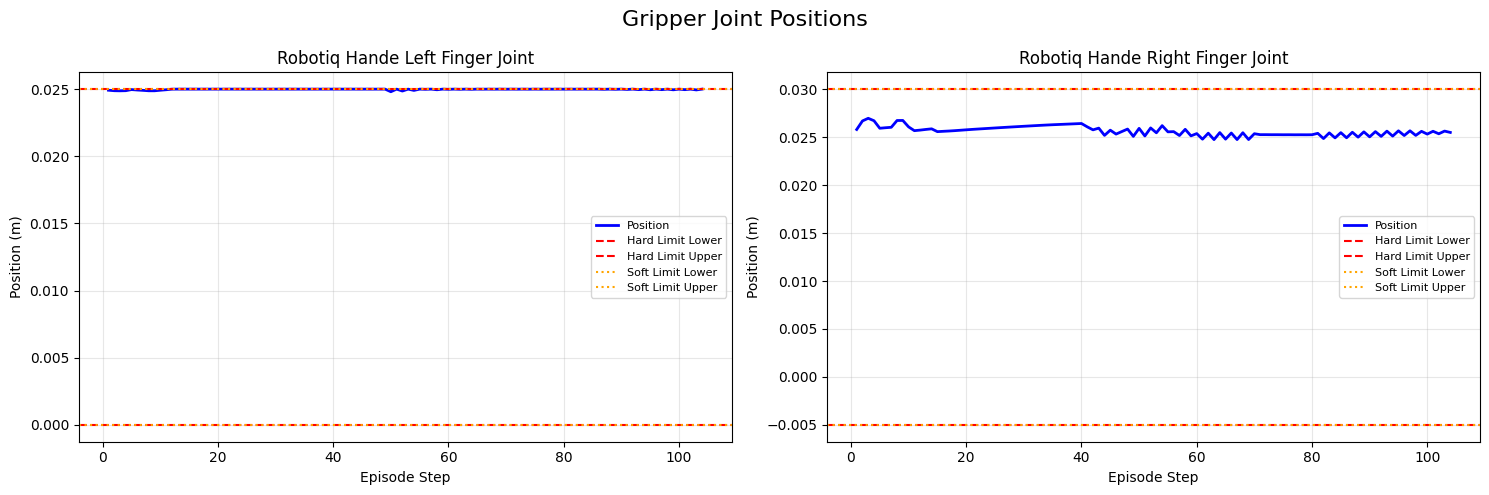

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Gripper Joint Positions', fontsize=16)

for idx, joint in enumerate(gripper_joints):
    ax = axes[idx]
    # Plot position
    ax.plot(episode['episode_step'], episode[f'{joint}_pos'], label='Position', linewidth=2, color='blue')
    # Plot position limits
    pos_limit_lower = episode[f'{joint}_pos_limit_lower'].iloc[0]
    pos_limit_upper = episode[f'{joint}_pos_limit_upper'].iloc[0]
    ax.axhline(y=pos_limit_lower, color='r', linestyle='--', label='Hard Limit Lower', linewidth=1.5)
    ax.axhline(y=pos_limit_upper, color='r', linestyle='--', label='Hard Limit Upper', linewidth=1.5)
    # Plot soft limits
    soft_pos_limit_lower = episode[f'{joint}_soft_pos_limit_lower'].iloc[0]
    soft_pos_limit_upper = episode[f'{joint}_soft_pos_limit_upper'].iloc[0]
    ax.axhline(y=soft_pos_limit_lower, color='orange', linestyle=':', label='Soft Limit Lower', linewidth=1.5)
    ax.axhline(y=soft_pos_limit_upper, color='orange', linestyle=':', label='Soft Limit Upper', linewidth=1.5)
    
    ax.set_xlabel('Episode Step')
    ax.set_ylabel('Position (m)')
    ax.set_title(joint.replace('_', ' ').title())
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gripper_joint_positions.png', dpi=300, bbox_inches='tight')
plt.show()

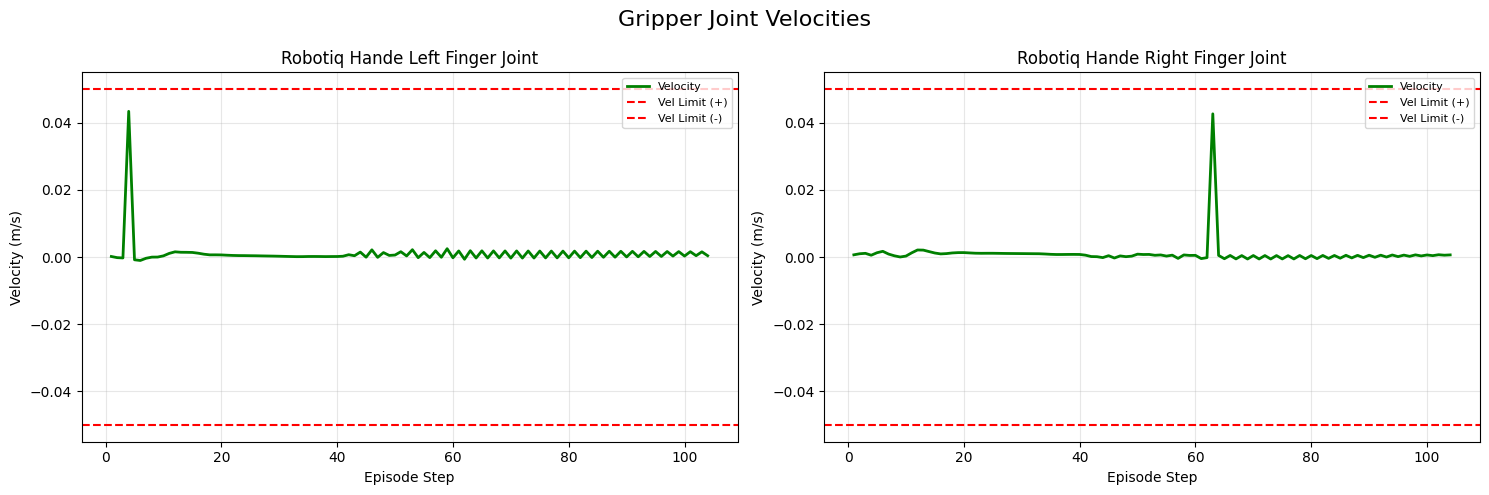

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Gripper Joint Velocities', fontsize=16)

for idx, joint in enumerate(gripper_joints):
    ax = axes[idx]
    # Plot velocity
    ax.plot(episode['episode_step'], episode[f'{joint}_vel'], label='Velocity', linewidth=2, color='green')
    # Plot velocity limits (symmetric)
    vel_limit = episode[f'{joint}_vel_limit'].iloc[0]
    ax.axhline(y=vel_limit, color='r', linestyle='--', label='Vel Limit (+)', linewidth=1.5)
    ax.axhline(y=-vel_limit, color='r', linestyle='--', label='Vel Limit (-)', linewidth=1.5)
    
    ax.set_xlabel('Episode Step')
    ax.set_ylabel('Velocity (m/s)')
    ax.set_title(joint.replace('_', ' ').title())
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gripper_joint_velocities.png', dpi=300, bbox_inches='tight')
plt.show()